# Rはどのようにしてfor文を避けているか

近年、for文をdisる風潮が高まってきていることは
みなさんも薄々肌で感じているのではないかと思います。

ここでは、普段あまり見慣れないRコードを題材とし、そこでは
どのようにしてループ処理を簡潔にしているか、いくつか例を紹介します。

## お題1: 表形式のデータに対して、1列計算結果を追加せよ
対象データとして、数理統計学のチュートリアルで良く用いられる`iris`データを使用します。

In [128]:
# 必要なパッケージの読み込み
#install.packages('purrrlyr')
library(dplyr)
library(purrr)
library(purrrlyr)
# kmeansのplot用
library(cluster)

In [91]:
head(iris) # head()はdata.frameの先頭数件だけに絞ってくれる
?iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


割りと有名な、がくと花弁から花の種類を判別するためのデータ・セットです。

念のため、図説。

![](https://www.wpclipart.com/plants/diagrams/plant_parts/petal_sepal_label.png)

上記のような表形式のデータ構造(`data.frame`)に対して、**行**ごとになんらかの値を計算し、新しい列として追加します。

ここでは、**irisデータの1列目(`Sepal.Length`)が5以上かどうかを○×判定する**出力**列を最後列として追加してください。**

### Rをはじめて触る人が書きそうなコード
素朴にfor文を用いて処理してみます。

In [111]:
# 適当な定数
T_CHR <- '○'
F_CHR <- '×'

# 関数定義
# ここでは、入力された値が十分大きければ○、そうでなければ×を返す。
mark_long <- function(x) {
  ifelse(x >= 5, T_CHR, F_CHR)
}

# 処理部

new_vals <- c()
for (i in iris$Sepal.Length) {
  new_vals <- c(new_vals, mark_long(i))    
}
iris$`出力` <- new_vals # 「出力」という列名で列追加
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,出力
5.1,3.5,1.4,0.2,setosa,○
4.9,3.0,1.4,0.2,setosa,×
4.7,3.2,1.3,0.2,setosa,×
4.6,3.1,1.5,0.2,setosa,×
5.0,3.6,1.4,0.2,setosa,○
5.4,3.9,1.7,0.4,setosa,○


for文は`Python`に似ているでしょうか。`C`などと違って、`i`には`Sepal.Length`の各値が入ります。
もし、よりCらしく書くならば、for文内のiは

```
for (i in seq_along(iris$Sepal.Length)) {
  new_vals <- c(new_vals, mark_long(iris$Sepal.Length[i]))
}
```

のようになります。

### Rの基本はベクトルだよと習った先ほどの人
実は、Rではデータの基本単位がベクトル（配列）になります。
そのため、関数は引数にベクトルが渡された場合、各ベクトルに対して一括で処理を行い、結果のベクトルを返します。

In [46]:
# 基本はベクトル
s1 <- '○' # これは要素1の文字列ベクトル
s2 <- c('○','×','△') # これは要素3の文字列ベクトル

a <- 100 # これは要素1の数値ベクトル
b <- c(1,2,3,4,5) # これは要素5の数値ベクトル
print(a + b)

c <- c(10,20)
(b + c) # 要素数が一致しなくても一応計算できる

[1] 101 102 103 104 105


Warning message in b + c:
“longer object length is not a multiple of shorter object length”

[1] 11 22 13 24 15

これを踏まえて、先程のfor文を書き換えてみます。
実はfor文は不要だったことがわかります。

In [41]:
# 先程と同じ関数定義
mark_long <- function(x) {
  ifelse(x >= 5, T_CHR, F_CHR)
}

new_vals <- mark_long(iris$Sepal.Length)
iris$`出力` <- new_vals
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,出力
5.1,3.5,1.4,0.2,setosa,○
4.9,3.0,1.4,0.2,setosa,×
4.7,3.2,1.3,0.2,setosa,×
4.6,3.1,1.5,0.2,setosa,×
5.0,3.6,1.4,0.2,setosa,○
5.4,3.9,1.7,0.4,setosa,○


### 少し関数型言語らしく書く
Rは上記のように手続き型で記述することもある程度は可能ですが、人によっては関数型言語に分類されることもあります。
せっかくですので、代入処理を行わずに、先ほどの処理を記述してみましょう。

In [65]:
iris %>%
  dplyr::mutate(出力 = mark_long(Sepal.Length)) %>%
  head()
# A %>% B は B(A) を読みやすく記述するためのもの。指定がない場合、AはBの第一引数に渡される
# %>% を使わない場合は以下のように記述する。
# head(dplyr::mutate(iris, 出力 = mark_long(Sepal.Length)))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,出力
5.1,3.5,1.4,0.2,setosa,○
4.9,3.0,1.4,0.2,setosa,×
4.7,3.2,1.3,0.2,setosa,×
4.6,3.1,1.5,0.2,setosa,×
5.0,3.6,1.4,0.2,setosa,○
5.4,3.9,1.7,0.4,setosa,○


別解として、後でとりあげる`purrr`系パッケージを用いる方法もあります。

In [67]:
mark_long_sepal <- function(row, colName) {
  ifelse(row[[colName]] >= 5, T_CHR, F_CHR)
}
# '出力'列を追加し、Sepal.Lengthが5以上のものかどうかを見やすくする
iris %>%
  by_row(mark_long_sepal, colName='Sepal.Length', .to='出力') %>%
  head() # 出力結果を見やすくするため、先頭のみ表示

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,出力
5.1,3.5,1.4,0.2,setosa,○
4.9,3.0,1.4,0.2,setosa,×
4.7,3.2,1.3,0.2,setosa,×
4.6,3.1,1.5,0.2,setosa,×
5.0,3.6,1.4,0.2,setosa,○
5.4,3.9,1.7,0.4,setosa,○


いかがでしたでしょうか。
次のお題では、もう少しだけ複雑な処理を取り扱ってみます。

# お題2: 表形式データをグループ化し、各グループの集計値を計算せよ
今度は、先程とは少し違った表形式データを用いて、集計処理を行ってみましょう。

In [150]:
head(mtcars)
#?mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


このデータも統計学習でよく使われるもので、1973～74年に販売された32の車種に関するロードテストの評価データです。
一応データの意味も見ていきますと、行ごとに各車種の結果があり、それぞれの列の意味は以下のようになっています。

```
Format
A data frame with 32 observations on 11 variables.
[, 1]	mpg	Miles/(US) gallon
[, 2]	cyl	Number of cylinders
[, 3]	disp	Displacement (cu.in.)
[, 4]	hp	Gross horsepower
[, 5]	drat	Rear axle ratio
[, 6]	wt	Weight (1000 lbs)
[, 7]	qsec	1/4 mile time
[, 8]	vs	V/S
[, 9]	am	Transmission (0 = automatic, 1 = manual)
[,10]	gear	Number of forward gears
[,11]	carb	Number of carburetors
```

このデータを用いて、エンジン気筒数(`cyl`)ごとに、燃費(`mpg`)と車重(`wt`)の単回帰分析を行い、**エンジン気筒数ごとの決定係数を算出してください。**

また、決定係数が0.5以上の場合、(乱暴な解釈でよければ)このモデルはそこそこあてはまりが良いと考えることが出来ます。このことを踏まえて、**結果から何か考察が可能でしょうか。**

参考に、全車種を用いた、燃費と車重の散布図を表示しておきます。

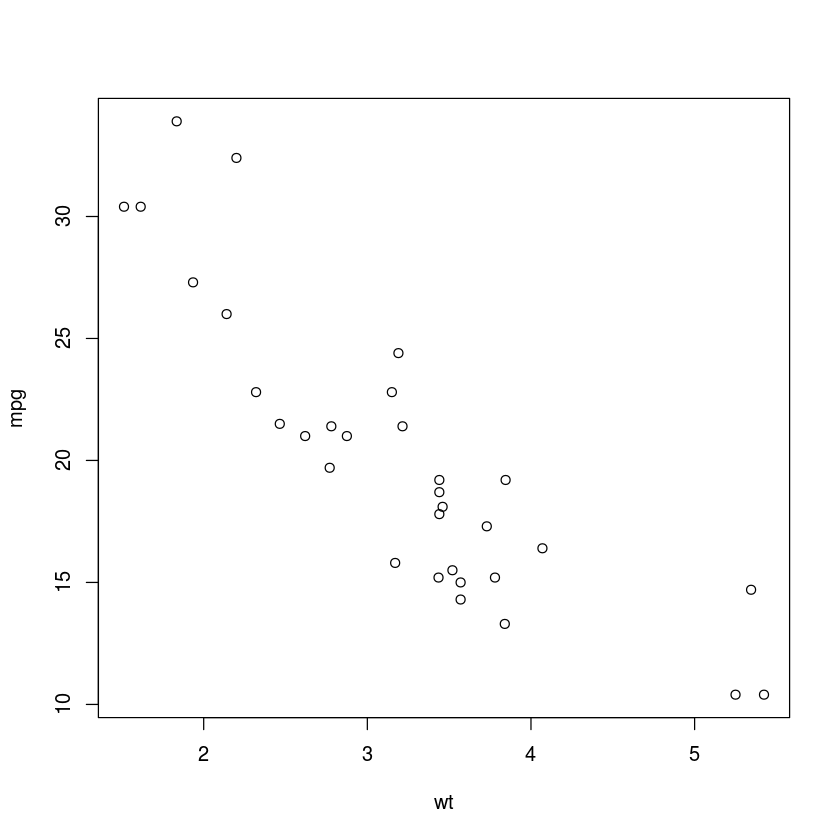

In [107]:
plot(mpg ~ wt, data = mtcars)

### Rをはじめて触る人が書きそうなコード
単回帰については、先輩に

```
lm(mpg ~ wt, data = data)
```

でモデルを生成できるよ、と教えてもらいました。

素朴にfor文で書くと、以下のようになるのではないかと思います。

In [115]:
# 関数定義
# グループ化されたデータが与えられた時に、単回帰分析を行い、決定係数を返します。
calc_r2 <- function(data) {
  model <- lm(mpg ~ wt, data = data)
  summary(model)$r.squared # 上記のmodelは決定係数を保持しています。
}

# 処理部

# cyl: 表形式データをcyl(シリンダー数)で分割。R的にはlistと呼ばれるデータ形式に各data.frameが格納される形になります。
mtcars_cyl_list <- split(mtcars, mtcars$cyl)
r2s <- c() # 結果の格納先
for (data in mtcars_cyl_list) {
  model <- lm(mpg ~ wt, data = data)
  r2 <- summary(model)$r.squared # 上記のmodelは決定係数を保持しています。
  r2s <- c(r2s, r2) # 追加
}
names(r2s) <- names(mtcars_cyl_list) # 結果の表示用に、シリンダー数を名前として付ける
r2s

4         6         8 
0.5086326 0.4645102 0.4229655

### Rを少しかじっている人
Rには標準で`for`文を避けるために用意された、(初心者殺しと悪名高い)`apply`一家(ファミリー)と呼ばれる関数群があります。
試しにこれを使ってみましょう。

In [116]:
sapply(mtcars_cyl_list, function(data) {
  model <- lm(mpg ~ wt, data = data)
  summary(model)$r.squared # 上記のmodelは決定係数を保持しています。
})

4         6         8 
0.5086326 0.4645102 0.4229655

幾分簡潔に記述できましたね。

ただし、apply系関数は以下のように5通りあります。
- apply
- sapply
- lapply
- tapply
- mapply

実際に使用する場合は、用途に応じて適切なものを選ぶ必要があります。この辺りが、難しいと言われる所以でしょう。

### 関数型言語らしく書く
上の方法でも、無名関数内(`function(data){}`)の処理を1文にまとめれば良さそうですが、最近ぽい書き方も試してみましょう。

In [137]:
mtcars %>%
  split(.$cyl) %>%
  map(~ lm(mpg ~ wt, data = .x)) %>%
  map(summary) %>%
  map_dbl("r.squared")

4         6         8 
0.5086326 0.4645102 0.4229655

## ところで、なんでfor文てダメだったんだっけ

一番はじめに出てきた`for`文のコードをもう一度、今度はコメント付きで掲載します。

In [122]:
r2s <- c() # 結果の格納先
# 言語によっては for(int i = 0; i < length(Sepal.Length); ++i) のような処理になる。
#   iなどのアクセサで配列にアクセスすること自体、可読性が悪い。indexのような名前にしても
#   index + 1 などのような処理を許してしまうことが多く、保守性の良くないコードやバグの温床となる。
#   さらに、2重以上のループの場合、第3者が意図をひと目で理解することはほとんど不可能である。
for (data in mtcars_cyl_list) {
  model <- lm(mpg ~ wt, data = data)
  r2 <- summary(model)$r.squared # 上記のmodelは決定係数を保持しています。
  # for文の内部で、forのスコープ外の状態(変数など)を代入処理などで変更すると、
  # この部分の処理は直列処理となり、並列化できなくなる。
  # 工夫されている言語やライブラリでは並列forをサポートする場合もあるが、代入操作に関しては同様の扱い。
  # （このような処理を「副作用がある」と呼ぶことがある。ループ内での副作用はコードスタイルとしては推奨されないことが多い。
  r2s <- c(r2s, r2) # 追加
}

- インデックスを用いることが、可読性や保守性の観点から良くない。
  - モダンな言語では、イテレータを使うようになってる。
- ループ内で状態を変更するコードは並列化が難しい。動的言語では、解析時までループ内の状態がわからないため、副作用のないループコードでも自動で並列化することは難しい。

In [ ]:
mtcars %>%
  split(.$cyl) %>%
  # 原理的にはここ以降の処理を並列化できる。
  map(~ lm(mpg ~ wt, data = .x)) %>%
  map(summary) %>%
  map_dbl("r.squared")

cf. https://twitter.com/hadleywickham/status/840316630496239616

## 結論

- for文は全く使う必要がない
- 大抵の処理は代入演算すら不要

**みんな、関数型の考え方に気軽に触れてみましょう**


# 以降、質問コーナーで出たもの

## Rの`<-`演算子と`=`演算子は何が違うんですか？
- あまり違いはないが、`<-`は代入操作、`=`は引数の割当等に使われることが多い。
- list()やdata.frame()の中で`<-`を使うこともできるが、結果が人の理解を超えると思われるので、使わないほうがいい。

In [176]:
# a <- 3 と同じ
a = 3
a

[1] 3

In [175]:
# <- は -> として左辺を右辺に代入することもできる
3 -> a
a

[1] 3

In [152]:
# = 演算子では上のようなことはできない。
3 = a

ERROR: Error in 3 = a: invalid (do_set) left-hand side to assignment


## 関数に引数を指定するときの名前付け渡しについて
- 名前付きで引数を指定する場合、関数の引数順序は自由に変更できる。

In [157]:
hoge <- function(a, b) { a + b }
hoge(2,5)

[1] 7

In [160]:
hoge(b <- 2, a <- 2)

[1] 4